# Aula 3 (07/10/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

## Operações básicas, equalização de histograma e segmentação por limiar

---

## Arithmetic Operations on Images
Adição, subtração e operações bit a bit.

#### Adição:
```cv.add()```

- Adição pelo OpenCV se baseia em saturação: 250+10 = 260 => 255

- Adição pelo numpy se baseia em operação por modulo: 250+10 = 260 % 256 = 4



> Note: imagens devem ter mesma profundidade e mesmo tipo. A operação também pode ser feita com o numpy.



In [1]:
import cv2
import sys
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Representações de pixels
x = np.uint8([250])
y = np.uint8([10])

print( cv2.add(x,y) ) # Opencv: 250+10 = 260 => 255
print( x+y )         # Numpy: 250+10 = 260 % 256 = 4

[[255]]
[4]


#### Linear Blending

Linear Blending, ou image blending, também é um tipo de adição, porém se baseia em dar "peso" aos pixels de cada imagem ao alterar o ganho. Isso gera a impressão de transição de cena, como feita em muitos filmes.  

![Linear Blending](https://docs.opencv.org/3.4.7/blending.jpg)

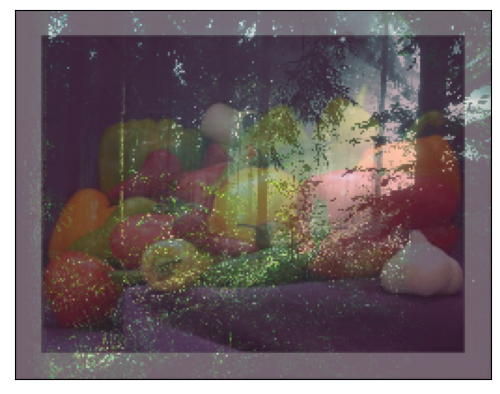

In [3]:
# Ler o arquivo imagem e associá-lo a uma variável
img1 = cv2.imread('images\\forest.jpg')
img2 = cv2.imread('images\\pimenta.jpg')

# Exceção caso não exita o diretório informado 
if img1 is None:
    sys.exit("Could not read image 1.")
elif img2 is None:
    sys.exit("Could not read image 2.")

# Mudar o tamanho da maior imagem para que fique com o tamanho da menor
img1 = cv2.resize(img1, (img2.shape[1],img2.shape[0]))

# adicionar imagens pelo OpenCV
img_blend = cv2.addWeighted(img1,0.7,img2,0.3,0)

'''
# Mostrar a soma em uma janela
cv2.imshow("Janela 1", img_blend)
k = cv2.waitKey(0) # Esperar que o usuário aperte uma tecla

# Se teclar s --> salvar imagem
# Se teclar qualquer outra, fechar janelas
if k == ord("s"):
    cv2.imwrite('images\img_blend.png', img_blend)
    cv2.destroyAllWindows()
else:
    cv2.destroyAllWindows()
'''

# Plotar a imagem com o Matplotlib
img_blend = cv2.cvtColor(img_blend, cv2.COLOR_BGR2RGB) # Converter a imagem de BGR para RGB
plt.imshow(img_blend)
plt.xticks([]), plt.yticks([])  # Esconder eixo x e y
plt.show()

#### Operação bit a bit
Bom para trabalhar com regiões de interesse (ROI) não retangulares. 

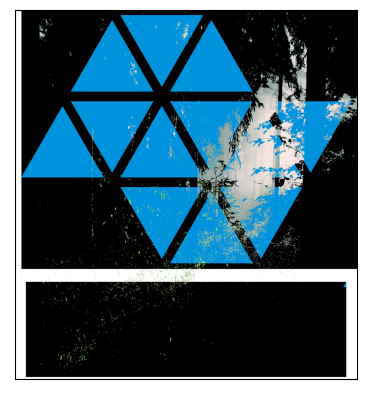

In [4]:
# Load two images
img1 = cv2.imread('images\\unesp_logo.png')
img2 = cv2.imread('images\\forest.jpg')

# Exceção caso não exita o diretório informado 
if img1 is None:
    sys.exit("Could not read image 1.")
elif img2 is None:
    sys.exit("Could not read image 2.")

# Mudar o tamanho da maior imagem para que fique com o tamanho da menor
img2 = cv2.resize(img2, (img1.shape[1],img1.shape[0]))

# Criar uma ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Criar mascaras para a logo
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) # converter em escala de cinza
ret, mask = cv2.threshold(img2gray, 150, 255, cv2.THRESH_BINARY) # realizar treshold para image ter valore binários
mask_inv = cv2.bitwise_not(mask)

# deixar preto a parte que está no ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Pegar a parte da logo de interesse
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Colocar a logo na ROI e alterar a imagem principal
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

# Plotar imagem com Opencv
'''
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

# Plotar a imagem com o Matplotlib
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # Converter a imagem de BGR para RGB
plt.imshow(img1)
plt.xticks([]), plt.yticks([])  # Esconder eixo x e y
plt.show()

---

## Equalização de Histograma
Histograma mostra a quantidade de pixels presentes em cada faixa de valor (0 a 255, na maior parte das vezes).

Terminologias:
- **BIN**: sub-part do conjunto de pixels. Abrange a soma de um intervalo de valores de pixels.
- **DIMS**: Número de parâmetros que será utilizada para diferenciar a coleta de dados. 
- **RANGE**: intervalo dos valores que quer medir

In [5]:
# No opencv

img = cv2.imread('images\\forest.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [6]:
# No numpy

hist,bins = np.histogram(img.ravel(),256,[0,256])

### Plotar histograma

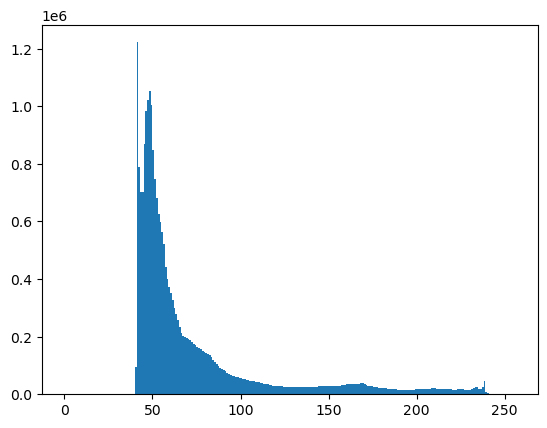

In [7]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

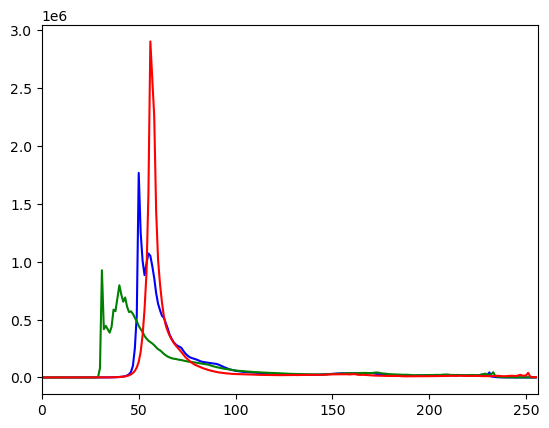

In [8]:
# Histograma para RGB

img = cv2.imread('images\\forest.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

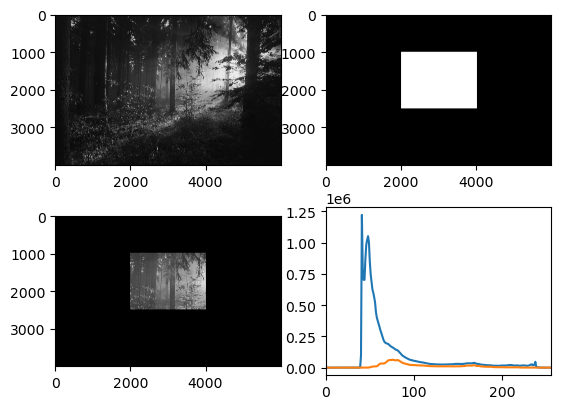

In [9]:
# Pelo Opencv

img = cv2.imread('images\\forest.jpg',0)

# Criar a máscara
mask = np.zeros(img.shape[:2], np.uint8)
mask[1000:2500, 2000:4000] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calcular histograma com mácara e sem máscara
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

### Equalização
Se trata em dividir a contagem de pixels concentrada em um intervalo, para todo o espectro de valores. Isso como forma de melhorar o contraste da imagem, entre outras coisas

Ela é usada como uma "ferramenta de referência" para fazer todas as imagens com as mesmas condições de iluminação. Isso é útil em muitos casos. Por exemplo, no reconhecimento de rostos, antes de treinar os dados de rostos, as imagens dos rostos são equalizadas em histogramas para torná-los todos com as mesmas condições de iluminação.

![Equalization](https://docs.opencv.org/3.4.7/histogram_equalization.png)


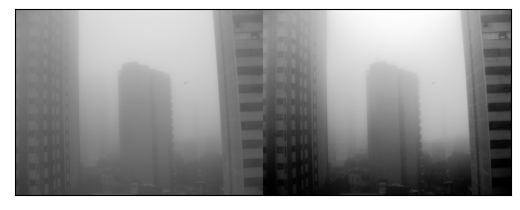

In [10]:
img = cv2.imread('images\\fog.jpg',0)


equ = cv2.equalizeHist(img) # Aplicando equalização global no histograma da imagem
res = np.hstack((img,equ)) #Coloca imagem uma do lado da outra

# Plotar a imagem com Opencv
'''
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

# Plotar a imagem com o Matplotlib
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB) # Converter a imagem de BGR para RGB
plt.imshow(res)
plt.xticks([]), plt.yticks([])  # Esconder eixo x e y
plt.show()

### CLAHE (Contrast Limited Adaptive Histogram Equalization)

Uma forma adaptada de equalização, que procura corrigir o problema de saturação em certas partes da imagem, que causa perda de informações.

![Histograma Global com saturação](https://i0.wp.com/theailearner.com/wp-content/uploads/2019/04/AHE.png?resize=625%2C254&ssl=1)

Ela faz isso através da divisão da equalização por blocos (8x8 default). Após isso, é feita uma averiguação com limitação de contraste. Essa limitação consiste em averiguar bins do histograma e ver se em algum foi ultrapassado o limite de contraste fixado (40 default Opencv). Caso encontrar algum bin, os pixels em saturação serão espalhados uniformemento por outros bins.

Por fim, uma interpolação bilinear é aplicada.

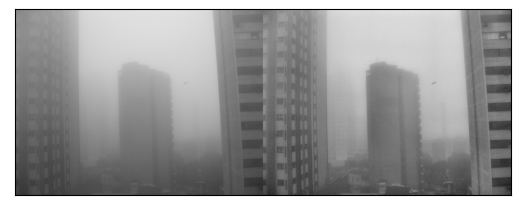

In [11]:
img = cv2.imread('images\\fog.jpg',0)

# Aplicando CLAHE na imagem
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
res = np.hstack((img,cl1)) #Coloca imagem uma do lado da outra

# Plotar a imagem com Opencv
'''
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
cv2.imwrite('images\\fog_CLAHE.jpg', cl1)

# Plotar a imagem com o Matplotlib
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB) # Converter a imagem de BGR para RGB
plt.imshow(res)
plt.xticks([]), plt.yticks([])  # Esconder eixo x e y
plt.show()

### Histograma 2D 

Quando se trata de dois canais em um histograma, estamos tratando de um histograma 2D. Assim, estaremos considerando mais de uma feature na imagem e isso requer uma nova função no Opencv.

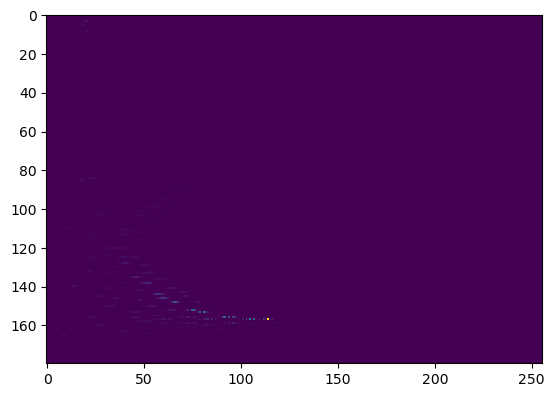

In [12]:
img = cv2.imread('images\\forest.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# Calculo do histograma, sendo cv2.calcHist(imagem, canais, mascara, número de bins, range do Hue e da Saturação)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Plotar imagem com Matplotlib
plt.imshow(hist,interpolation = 'nearest')
plt.show()

### Histogram Backprojection

Usado para segmentação de imagens, normalmente para encontrar objetos de interesse. Consisitem criar uma nova imagem em que cada pixel demonstra uma probabilidade do objeto estar contido nele. Quanto maior a probabilidade, maior valor o pixel terá.

> Note: o histograma do objeto deve ser normalizado antes de passar para a função backproject.

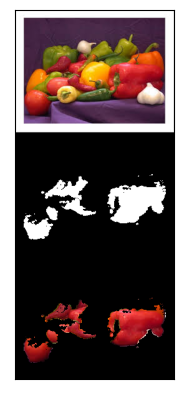

In [13]:
# roi é o objeto ou a região do objeto que queremos procurar
roi = cv2.imread('images\\object_pimenta.jpg') # salvando roi como lateral do prédio
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

# target é a imagem em que vai ser feita a busca do objeto
target = cv2.imread('images\\pimenta.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

# calcular o histograma do objeto
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

# normalizar histograma e aplicar backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

# convolucionar com disco citcular
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

# threshold e binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)
res = np.vstack((target,thresh,res))

# Plotar a imagem com o Matplotlib
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB) # Converter a imagem de BGR para RGB
plt.imshow(res)
plt.xticks([]), plt.yticks([])  # Esconder eixo x e y
plt.show()